## Social housing Status Visualization

#### Import necessary libraries

In [17]:
import pymongo
import pandas as pd
from urllib.parse import quote_plus
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.patches import Patch

#### Connect to mongodb cluster

In [2]:
# MongoDB connection parameters
username = "x23242361"
password = "housing@1234"
cluster_url = "housing.dzyvgkh.mongodb.net"

encoded_username = quote_plus(username)
encoded_password = quote_plus(password)

connection_string = f"mongodb+srv://{encoded_username}:{encoded_password}@{cluster_url}/?retryWrites=true&w=majority"

client = pymongo.MongoClient(connection_string)
print(client.list_database_names())

db = client['construction_cost']

['construction_cost', 'crime_ireland', 'sample_mflix', 'admin', 'local']


#### Fetch the required data

In [3]:
# Access the collection
processed_collection = db['processed_housing_construction']
columns = {"Funding Programme": 1, "LA": 1, "Scheme/Project Name": 1, "No_ of Units": 1,"address_county":1, "latitude":1, "longitude":1, "status":1,"garda division":1}
cursor = processed_collection.find({}, columns)

data = list(cursor)

processed_dataframe = pd.DataFrame(data)

In [4]:
processed_dataframe.head()

,_id,Funding Programme,LA,Scheme/Project Name,No_ of Units,address_county,latitude,longitude,status,garda division
0,6627a6b99a97b07a7538f415,SHIP CONSTRUCTION RAPID,DLR,george's place,12,"george's place, DLR, Ireland",53.300739,-6.178778,Completed,DMR East
1,6627a6b99a97b07a7538f414,SHIP CONSTRUCTION RAPID,DLR,rockville drive (glenamuck cottages),13,"rockville drive (glenamuck cottages), DLR, Ire...",53.243988,-6.184621,Stage 2 Pre Planning,DMR East
2,6627a6b99a97b07a7538f416,SHIP CONSTRUCTION RAPID,DLR,"ballyogan court, ballyogan",67,"ballyogan court, ballyogan, DLR, Ireland",53.258455,-6.188817,Stage 2 Pre Planning,DMR East
3,6627a6b99a97b07a7538f411,SHIP CONSTRUCTION TURNKEY,DLR,"dunedin terrace, monkstown",14,"dunedin terrace, monkstown, DLR, Ireland",53.286604,-6.151552,Completed,DMR East
4,6627a6b99a97b07a7538f41f,SHIP CONSTRUCTION,DLR,broadford rise,21,"broadford rise, DLR, Ireland",53.275625,-6.258054,On Site,DMR East


#### Distribution of number of units per construction site

<Axes: xlabel='No_ of Units', ylabel='Count'>

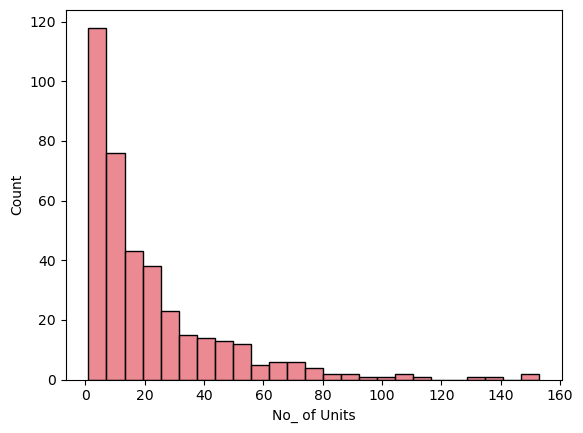

In [5]:
sns.histplot(processed_dataframe['No_ of Units'],color='#e6636f')

#### Different stages of construction sites at different garda division

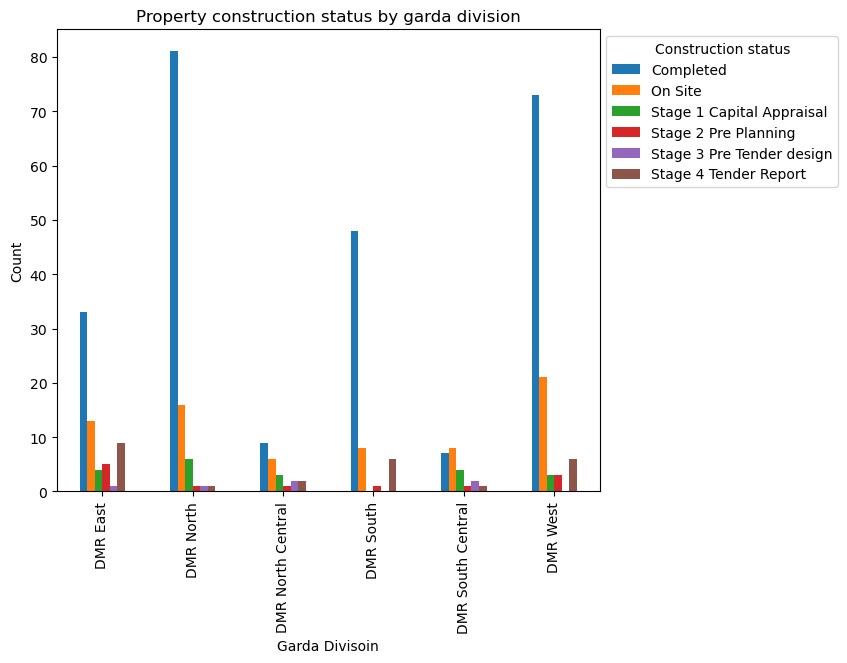

In [6]:
grouped = processed_dataframe.groupby(['garda division', 'status']).size().unstack()

grouped.plot(kind='bar', figsize=(7, 6))
plt.title('Property construction status by garda division')
plt.xlabel('Garda Divisoin')
plt.ylabel('Count')
plt.legend(title='Construction status', bbox_to_anchor=(1, 1))
plt.show()

#### Distribution of construction companies 

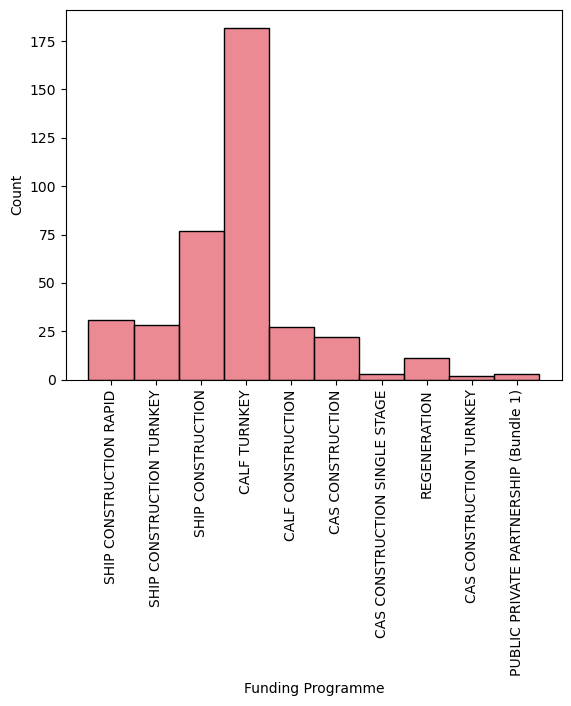

In [7]:
sns.histplot(processed_dataframe['Funding Programme'],color='#e6636f')

plt.xticks(rotation=90)

plt.show()

#### Distribution of different stages of construction

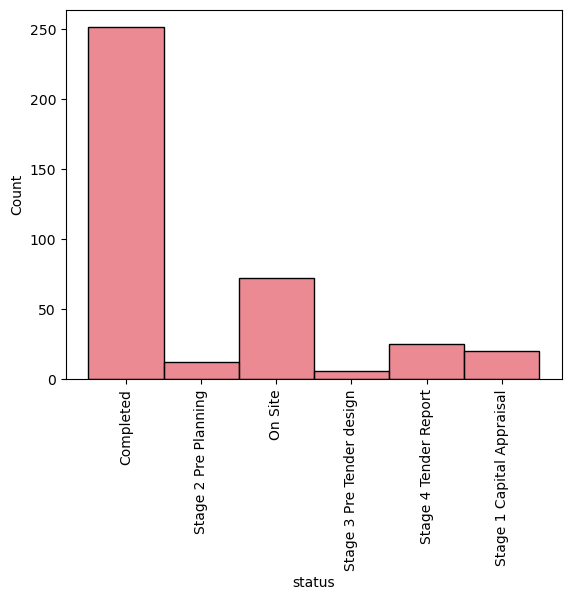

In [8]:
sns.histplot(processed_dataframe['status'],color='#e6636f')

plt.xticks(rotation=90)

plt.show()

#### Distribution of construction sites across garda division

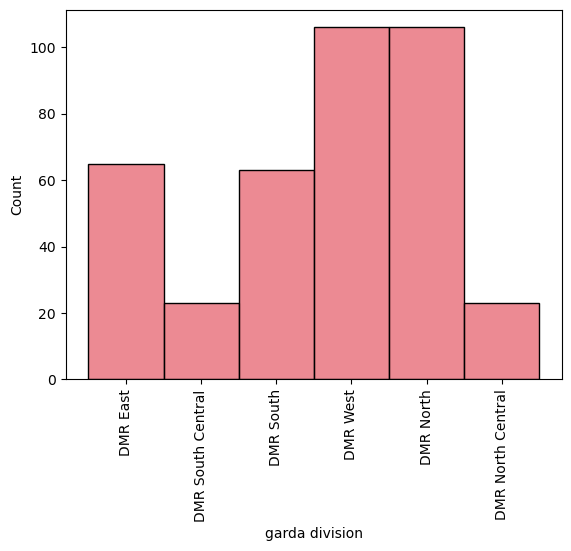

In [9]:
sns.histplot(processed_dataframe['garda division'],color='#e6636f')

plt.xticks(rotation=90)

plt.show()

In [11]:
gdf = gpd.read_file("Garda_Districts_-_An_Garda_Siochana.geojson")
dublin_gdf = gdf[gdf['Division'].str.contains('DMR', case=False)]

division_colors = {
    'DMR North': 'moccasin',
    'DMR South': 'lightblue',
    'DMR East': 'lightgreen',
    'DMR West': 'gray',
    'DMR North Central': 'lavender',
    'DMR South Central': 'lightpink'
}

DMR_north = processed_dataframe[processed_dataframe['garda division'] == 'DMR North'].copy()
DMR_north_central = processed_dataframe[processed_dataframe['garda division'] == 'DMR North Central'].copy()
DMR_south = processed_dataframe[processed_dataframe['garda division'] == 'DMR South'].copy()
DMR_south_central = processed_dataframe[processed_dataframe['garda division'] == 'DMR South Central'].copy()
DMR_west = processed_dataframe[processed_dataframe['garda division'] == 'DMR West'].copy()
DMR_east = processed_dataframe[processed_dataframe['garda division'] == 'DMR East'].copy()

#### Graphical representation of Garda division and distribution of construction sites

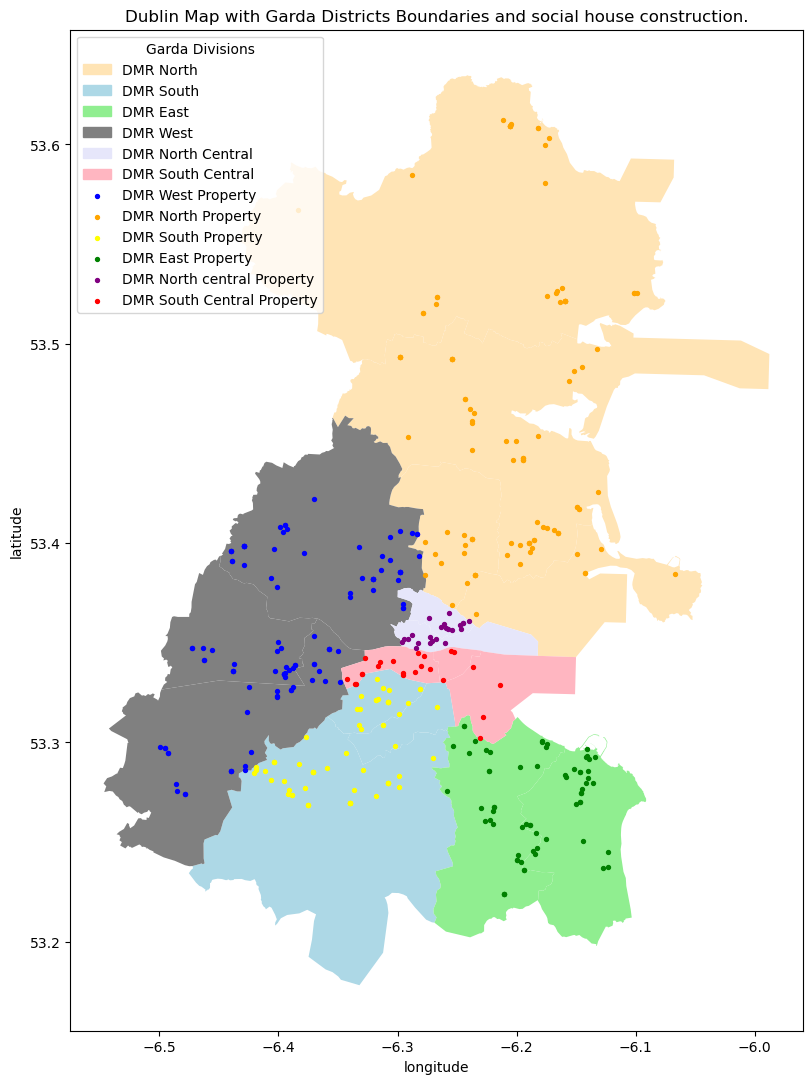

In [19]:
fig, ax = plt.subplots(figsize=(13, 13))
for division, color in division_colors.items():
     dublin_gdf[dublin_gdf['Division'] == division].plot(ax=ax, color=color, label=division)

legend_handles = [Patch(color=color, label=division) for division, color in division_colors.items()]
ax.legend(handles=legend_handles, title='Garda Divisions')

plt.title("Dublin Map with Garda Districts Boundaries and social house construction.")

DMR_west.plot(kind='scatter', x='longitude', y='latitude', color='blue', ax=ax, label='DMR West Property',s=8)
DMR_north.plot(kind='scatter', x='longitude', y='latitude', color='orange', ax=ax, label='DMR North Property',s=8)
DMR_south.plot(kind='scatter', x='longitude', y='latitude', color='yellow', ax=ax, label='DMR South Property',s=8)
DMR_east.plot(kind='scatter', x='longitude', y='latitude', color='green', ax=ax, label='DMR East Property',s=8)
DMR_north_central.plot(kind='scatter', x='longitude', y='latitude', color='purple', ax=ax, label='DMR North central Property',s=8)
DMR_south_central.plot(kind='scatter', x='longitude', y='latitude', color='red', ax=ax, label='DMR South Central Property',s=8)

plt.show()